In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as graph
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [280]:
class LogisticRegression:
    def __init__(self, learning_rate = 0.01, epoch = 1000):
        self.bias = 0
        self.weight = None
        self.epoch = epoch
        self.learning_rate = learning_rate
    
    def fit(self, x: np.ndarray, y: np.ndarray):
        n_sample, n_feature = x.shape
        self.weight = np.zeros(n_feature)

        for _ in range(self.epoch):
            pred = 1 / (1 + np.exp(-(x @ self.weight + self.bias)))
            error = pred - y
            
            dw = (x.T @ error)/ n_sample
            db = np.sum(error) / n_sample

            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, x: np.ndarray, threshold = 0.5):
        pred =  1 / (1 + np.exp(-(x @ self.weight + self.bias)))
        pred = (pred >= threshold).astype(int)

        return pred
    
    def score(self, x_test: np.ndarray, y_test: np.ndarray, threshold = 0.5):
        y_pred = self.predict(x_test)

        true_pos = np.sum((y_pred == 1) & (y_test == 1))
        false_neg = np.sum((y_pred == 0) & (y_test == 1))
        false_pos = np.sum((y_pred == 1) & (y_test == 0))
        true_neg = np.sum((y_pred == 0) & (y_test == 0))

        recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
        precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0

        return recall, precision
    
    def f1_score(self, x_test: np.ndarray, y_test: np.ndarray):
        recall, precision = self.score(x_test, y_test)
        
        return 2 * recall * precision / (recall + precision) if (recall + precision) > 0 else 0

In [281]:
iris = load_wine()
regression = LogisticRegression()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names, dtype=np.float128)
df['target'] = iris.target
df['target'] = (df['target'] == 0).astype(int)

In [282]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], random_state=42, train_size=0.8)

regression.fit(x_train, y_train)

In [283]:
thresholds = np.linspace(0, 1, 10)

x_plot = []
y_plot = []

for threshold in thresholds:
    recall, precision = regression.score(x_test, y_test, threshold)
    x_plot.append(recall)
    y_plot.append(precision)

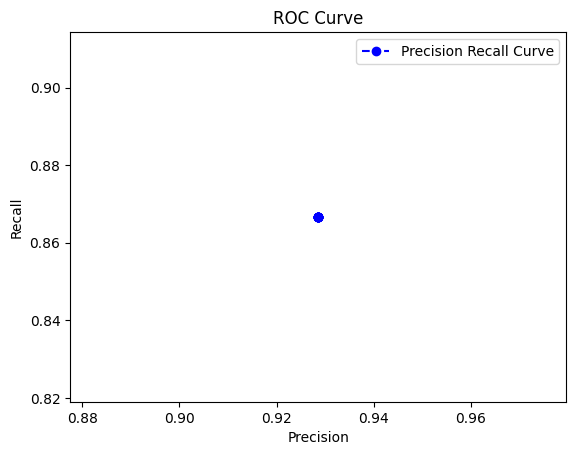

In [284]:
graph.plot(x_plot, y_plot, marker='o', linestyle='--', color='b', label="Precision Recall Curve")
graph.title("ROC Curve")
graph.xlabel("Precision")
graph.ylabel("Recall")
graph.legend()
graph.show()

# what da fok